In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
full = pd.read_csv('full.csv', index_col=0, header=[0], parse_dates=True)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN,NaN


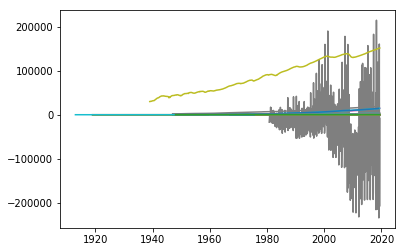

In [4]:
plt.plot(full)

In [5]:
def yoy_growth(series): # for monthly
    return series.pct_change(periods=12) * 100

In [6]:
cpi = full["CPIAUCSL"]

In [7]:
yoy_growth(cpi)["1980-01-01":"1981-01-01"]

1980-01-01    13.868613
1980-02-01    14.161850
1980-03-01    14.592275
1980-04-01    14.589235
1980-05-01    14.425770
1980-06-01    14.265928
1980-07-01    13.150685
1980-08-01    12.890095
1980-09-01    12.768817
1980-10-01    12.632979
1980-11-01    12.631579
1980-12-01    12.353706
1981-01-01    11.794872
Name: CPIAUCSL, dtype: float64

In [8]:
# just to validate
(cpi["1981-01-01"]/cpi["1980-01-01"] - 1) * 100

11.794871794871797

In [9]:
full.loc["2000-01-01"]
# to see which ones we need to convert to percentages

CPIAUCSL              169.30000
FEDFUNDS                5.45000
HOUST                1636.00000
INDPRO                 94.17580
INTDSRUSM193N           5.00000
ISRATIO                 1.38000
M2SL                 4656.30000
MTSDS133FMS         62152.00000
PAYEMS             131020.00000
PCE                  6535.30000
T10Y2YM                 0.22000
T10YFFM                 1.21000
UMCSENT               112.00000
UNRATE                  4.00000
USSLIND                 1.61000
A191RL1Q225SBEA         1.50000
A191RO1Q156NBEA         4.20000
GDPC1               12924.17900
GFDEGDQ188S            57.71743
GPDI                 1950.65000
PCEC                 6613.59700
AAA                     7.78000
BAA                     8.33000
CIVPART                67.30000
GS20                    6.86000
GS3                     6.49000
IRLTLT01USM156N         6.66000
M1SL                 1122.20000
MCOILWTICO             27.26000
PPIACO                128.30000
TCU                    82.05160
TOTALSA 

In [10]:
# drop GDPC1 as absolute level
full.drop(columns="GDPC1", inplace=True)

In [11]:
need_convert = ["CPIAUCSL", "HOUST", "INDPRO", "ISRATIO", "M2SL", "MTSDS133FMS", 
               "PAYEMS", "PCE", "UMCSENT", "GFDEGDQ188S", "GPDI", "PCEC", "CIVPART", "M1SL",
               "MCOILWTICO", "PPIACO", "TCU", "TOTALSA", "PMI"]

In [12]:
percented = full.copy()

for series in need_convert:
    percented[series] = yoy_growth(percented[series])
    
percented.loc["1980-01-01":"1981-01-01"]

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1980-01-01,13.868613,13.82,-17.730061,0.864167,12.00,NaN,8.100029,NaN,2.243041,12.972577,...,0.628931,10.65,10.88,10.80,7.585053,NaN,15.447154,-1.850639,-4.129872,-21.025641
1980-02-01,14.161850,14.13,-11.184211,0.328144,12.52,NaN,8.477283,NaN,2.052664,12.096455,...,0.313480,12.21,12.84,12.41,8.391220,NaN,16.021362,-2.308565,-13.347693,-13.745704
1980-03-01,14.592275,17.19,-43.313481,-0.313848,13.00,NaN,8.070327,NaN,1.693135,11.559561,...,-0.156740,12.49,14.05,12.75,7.144828,NaN,15.435356,-2.872433,-20.936170,-24.436742
1980-04-01,14.589235,17.61,-39.874142,-1.248161,13.00,NaN,7.139291,NaN,1.601485,10.192408,...,0.472441,11.42,12.02,11.47,4.293478,NaN,14.174252,-3.727081,-29.154796,-33.451957
1980-05-01,14.425770,10.98,-50.586354,-4.416649,12.94,NaN,7.240108,NaN,0.702759,9.064665,...,0.947867,10.44,9.44,10.18,4.112554,NaN,13.935484,-6.768570,-33.630166,-45.955882
1980-06-01,14.265928,9.47,-37.480397,-5.591036,11.40,NaN,7.463106,NaN,-0.007768,9.081678,...,0.314961,9.89,8.91,9.78,4.204606,NaN,13.717949,-7.875571,-18.008475,-42.504744
1980-07-01,13.150685,9.03,-27.897727,-6.192516,10.87,NaN,7.715361,NaN,-0.417881,10.150684,...,0.314465,10.32,9.27,10.25,4.453871,NaN,14.015152,-8.435336,-17.346939,-31.773879
1980-08-01,12.890095,9.61,-19.235096,-5.226518,10.00,NaN,7.942762,NaN,-0.222591,9.173063,...,0.157233,11.07,10.63,11.10,5.385428,NaN,14.949749,-7.478066,-22.239264,-8.080808
1980-09-01,12.768817,10.87,-19.705240,-3.796134,10.17,NaN,8.245650,NaN,-0.126208,8.972397,...,-0.313480,11.47,11.57,11.51,6.722911,NaN,13.349815,-6.080713,-23.649594,1.008065
1980-10-01,12.632979,12.81,-9.399167,-3.113695,11.00,NaN,8.518214,NaN,0.009947,10.690789,...,0.000000,11.75,12.01,11.75,7.405462,NaN,13.032887,-5.426714,-12.965223,13.265306


In [13]:
percented.loc["2010-01-01"]

CPIAUCSL            2.621111
FEDFUNDS            0.110000
HOUST              25.306122
INDPRO              0.688619
INTDSRUSM193N       0.500000
ISRATIO           -14.189189
M2SL                2.212191
MTSDS133FMS       -32.814347
PAYEMS             -3.182571
PCE                 2.228173
T10Y2YM             2.800000
T10YFFM             3.620000
UMCSENT            21.568627
UNRATE              9.800000
USSLIND             0.480000
A191RL1Q225SBEA     1.500000
A191RO1Q156NBEA     1.700000
GFDEGDQ188S        12.246205
GPDI                1.155554
PCEC                2.914671
AAA                 5.260000
BAA                 6.250000
CIVPART            -1.369863
GS20                4.500000
GS3                 1.490000
IRLTLT01USM156N     3.730000
M1SL                5.799848
MCOILWTICO         87.796691
PPIACO              6.250000
TCU                 1.215468
TOTALSA            11.312078
PMI                54.670330
Name: 2010-01-01 00:00:00, dtype: float64

In [14]:
print(full.shape)
print(percented.shape)

(1278, 32)
(1278, 32)


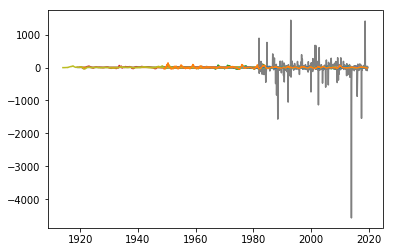

In [15]:
plt.plot(percented)

In [16]:
# which one is fluctuating so wildly?

for series in percented:
    col = percented[series]
    for data in col:
        if data < -2000:
            print(col.describe())
            break


count     453.000000
mean      -19.553977
std       303.943062
min     -4568.513854
25%       -32.373465
50%        -2.374777
75%        32.642459
max      1436.977111
Name: MTSDS133FMS, dtype: float64


In [17]:
# Federal Surplus or Deficit
# percented = percented.drop(columns="MTSDS133FMS")
percented.shape

(1278, 32)

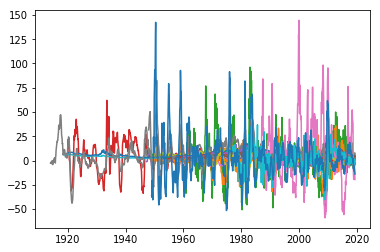

In [18]:
plt.plot(percented.drop(columns="MTSDS133FMS"))

In [22]:
# which one is fluctuating so wildly?

for series in percented:
    col = percented[series]
    for data in col:
        if data > 50:
            print(col.describe())
            break


count    714.000000
mean       2.058467
std       22.160182
min      -54.797048
25%       -9.865814
50%        1.533651
75%       13.241468
max       96.189376
Name: HOUST, dtype: float64
count    1194.000000
mean        3.727892
std        10.901953
min       -33.663254
25%        -0.172413
50%         3.458436
75%         7.857214
max        62.044334
Name: INDPRO, dtype: float64
count     453.000000
mean      -19.553977
std       303.943062
min     -4568.513854
25%       -32.373465
50%        -2.374777
75%        32.642459
max      1436.977111
Name: MTSDS133FMS, dtype: float64
count    858.000000
mean       7.364670
std       12.498979
min      -28.001828
25%        0.563269
50%        7.498335
75%       13.124711
max       82.665208
Name: GPDI, dtype: float64
count    390.000000
mean       9.402068
std       33.130930
min      -59.020862
25%      -10.992755
50%        7.062989
75%       27.728816
max      144.546211
Name: MCOILWTICO, dtype: float64
count    846.000000
mean       2.

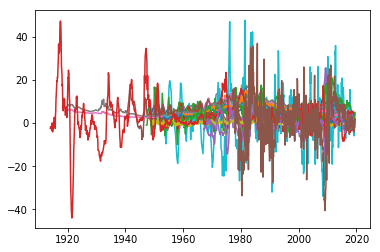

In [24]:
plt.plot(percented.drop(columns=["MTSDS133FMS", "MCOILWTICO", "PMI", "HOUST", "INDPRO", "GPDI"]))

In [19]:
percented.tail(8)
# data cuts off in Jan 2019

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
2018-11-01,2.194621,2.20,-7.467283,4.062132,NaN,0.740741,3.295557,47.894216,1.781281,4.709343,...,0.159236,3.27,2.91,3.12,1.914284,0.564972,3.266973,2.477965,-0.066845,1.906412
2018-12-01,1.945131,2.27,-6.316653,3.769242,NaN,2.962963,3.724372,-41.622111,1.815090,3.841979,...,0.637959,2.98,2.67,2.83,3.856589,-14.443677,2.394294,2.061983,1.129087,-8.585859
2019-01-01,1.522396,2.40,-3.295880,3.599663,NaN,2.205882,4.107989,-82.368950,1.908410,3.970694,...,0.797448,2.89,2.52,2.71,2.496510,-19.340659,0.606367,1.799688,-1.824297,-5.033557
2019-02-01,1.501390,2.40,-11.274131,2.652803,NaN,2.205882,3.984709,8.705671,1.719144,3.926454,...,0.317460,2.87,2.48,2.68,3.966874,-11.698538,-0.050176,0.836441,-2.909216,-10.708402
2019-03-01,1.863742,2.41,-9.984985,2.187933,NaN,2.222222,3.779445,-29.604825,1.697476,4.361886,...,0.158983,2.80,2.37,2.57,1.898094,-7.301132,0.903161,0.277673,0.880958,-6.745363
2019-04-01,2.001152,2.42,1.104972,0.871724,NaN,2.205882,3.865695,-25.180276,1.708705,4.371541,...,0.000000,2.76,2.31,2.53,3.355008,-3.607547,0.898652,-1.151076,-4.136446,-8.808290
2019-05-01,1.798952,2.39,-4.729730,2.049665,NaN,3.731343,4.107471,41.535192,1.572490,4.234687,...,0.000000,2.63,2.16,2.40,3.732283,-13.075164,-0.836614,0.009093,1.580289,-11.243612
2019-06-01,1.660866,2.38,7.542373,1.288519,NaN,3.731343,4.588983,-88.677229,1.544223,3.783086,...,0.000000,2.36,1.78,2.07,4.834473,-19.463681,-1.909892,-0.803915,0.705816,-13.833333


In [20]:
percented = percented.drop(percented.tail(5).index)
percented.tail(8)

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
2018-06-01,2.847057,1.82,-4.220779,3.428602,NaN,-3.597122,4.109720,-17.039221,1.688357,5.087403,...,0.159236,2.98,2.65,2.91,3.661477,50.221337,5.475207,2.590722,2.995057,6.194690
2018-07-01,2.948975,1.91,-1.003344,3.930738,NaN,-2.877698,3.911546,79.009758,1.668291,5.388915,...,0.000000,2.94,2.70,2.89,3.548396,52.219601,5.581395,2.942333,0.678601,3.180212
2018-08-01,2.683278,1.91,9.597258,5.264038,NaN,-2.877698,3.800746,98.857822,1.730827,5.423904,...,-0.317965,2.97,2.71,2.89,2.767615,41.673605,4.953560,4.107657,1.956483,3.225806
2018-09-01,2.269315,1.95,6.276870,5.405756,NaN,-2.173913,3.705648,1410.474258,1.791863,4.717353,...,-0.633914,3.08,2.84,3.00,3.620391,40.967483,4.517454,4.092990,-2.959922,-0.833333
2018-10-01,2.517164,2.19,-3.965107,4.059313,NaN,-0.729927,3.393570,58.969532,1.800247,4.912073,...,0.318979,3.27,2.94,3.15,3.160784,37.165568,4.976911,2.614911,-1.087372,-1.541096
2018-11-01,2.194621,2.20,-7.467283,4.062132,NaN,0.740741,3.295557,47.894216,1.781281,4.709343,...,0.159236,3.27,2.91,3.12,1.914284,0.564972,3.266973,2.477965,-0.066845,1.906412
2018-12-01,1.945131,2.27,-6.316653,3.769242,NaN,2.962963,3.724372,-41.622111,1.815090,3.841979,...,0.637959,2.98,2.67,2.83,3.856589,-14.443677,2.394294,2.061983,1.129087,-8.585859
2019-01-01,1.522396,2.40,-3.295880,3.599663,NaN,2.205882,4.107989,-82.368950,1.908410,3.970694,...,0.797448,2.89,2.52,2.71,2.496510,-19.340659,0.606367,1.799688,-1.824297,-5.033557


In [23]:
# drop some of head since growth rate
percented = percented.drop(percented.head(12).index)
percented.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.479339,NaN,NaN,NaN
1914-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.666667,NaN,NaN,NaN
1914-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.500000,NaN,NaN,NaN
1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.500000,NaN,NaN,NaN
1914-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.521008,NaN,NaN,NaN


In [24]:
percented.to_csv("growth_rate.csv")